In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
%matplotlib inline

In [2]:
obesity = pd.read_csv(os.path.join("..","Data","Clean","US_Adults_Percent_Overweight_by_State_Year_Clean.csv"))
liver = pd.read_csv(os.path.join("..","Data","Clean","Liver_Disease_Cirrhosis_Mortality_Clean.csv"))
alc_use = pd.read_csv(os.path.join("..","Data","Clean","Alcohol_Use_Geo_Data_Clean.csv"))

In [3]:
obesity_df = pd.DataFrame(obesity)
liver_df = pd.DataFrame(liver)
alc_use_df = pd.DataFrame(alc_use)

In [4]:
obesity_df.head()

,Location,2013,2014,2015,2016,2017
0,United States,0.638,0.641,0.645,0.648,0.654
1,Alabama,0.682,0.670,0.687,0.695,0.702
2,Alaska,0.661,0.648,0.672,0.667,0.667
3,Arizona,0.618,0.640,0.653,0.632,0.648
4,Arkansas,0.699,0.706,0.695,0.682,0.705


In [5]:
liver_df.head()

,STATE,AVERAGE DEATH RATE,TOTAL DEATHS,2005 DEATH RATE,2005 DEATH COUNT,2014 DEATH RATE,2014 DEATH COUNT,2015 DEATH RATE,2015 DEATH COUNT,2016 DEATH RATE,2016 DEATH COUNT,2017 DEATH RATE,2017 DEATH COUNT,14 - 17 DEATH RATE CHANGE,14 - 17 DEATH RATE % CHANGE,14 - 17 DEATHS % CHANGE
0,AK,13.30,495,9.0,52,10.7,84,15.4,114,16.3,124,15.1,121,4.4,0.411215,0.440476
1,AL,11.98,3414,9.7,478,11.8,683,12.5,716,13.2,781,12.7,756,0.9,0.076271,0.106881
2,AR,10.62,1833,7.5,228,10.4,369,12.1,421,11.8,416,11.3,399,0.9,0.086538,0.081301
3,AZ,14.24,5305,12.7,757,14.3,1084,15.0,1149,14.9,1178,14.3,1137,0.0,0.000000,0.048893
4,CA,12.02,24872,11.1,3822,12.0,5013,12.7,5425,12.2,5287,12.1,5325,0.1,0.008333,0.062238


In [6]:
alc_use_df.head()

,Geographic/Socioeconomic Type,Geographic/Socioeconomic Characteristic,Lifetime Alcohol Use 2017 (K),Lifetime Alcohol Use 2018 (K),Past Year Alcohol Use 2017 (K),Past Year Alcohol Use 2018 (K),Past Month Alcohol Use 2017 (K),Past Month Alcohol Use 2018 (K),Past Month Binge Alcohol Use 2017 (K),Past Month Binge Alcohol Use 2018 (K),Past Month Heavy Alcohol Use 2017 (K),Past Month Heavy Alcohol Use 2018 (K),YOY % Change Heavy Use,YOY % Change Binge Use
0,Overall,TOTAL,204536,206099,165552,166459,133148,132688,62122,62737,15785,15708,-0.004878,0.009900
1,GEOGRAPHIC REGION,Northeast,37109,36594,31502,30672,25778,24862,11820,11491,2918,2883,-0.011995,-0.027834
2,GEOGRAPHIC REGION,Midwest,44429,44548,36183,36532,29227,29577,13938,14425,3724,3638,-0.023093,0.034940
3,GEOGRAPHIC REGION,South,74907,76328,58610,59621,46082,46308,21881,22354,5674,5430,-0.043003,0.021617
4,GEOGRAPHIC REGION,West,48091,48630,39257,39634,32061,31940,14484,14467,3468,3757,0.083333,-0.001174


In [9]:
obs_states_df = obesity_df.loc[obesity_df['Location'].isin(["California", "Colorado", "Idaho","Oregon","Texas","Washington"])]
obs_states_df.head()
                                        

,Location,2013,2014,2015,2016,2017
5,California,0.601,0.597,0.604,0.610,0.609
6,Colorado,0.564,0.574,0.566,0.581,0.587
13,Idaho,0.649,0.657,0.652,0.645,0.659
38,Oregon,0.599,0.617,0.645,0.626,0.645
44,Texas,0.661,0.678,0.687,0.684,0.694


In [10]:
# x_axis = list(obs_states_df.columns.values)
# x_axis

['Location', '2013', '2014', '2015', '2016', '2017']

In [12]:
# x_axis.remove('Location')
# x_axis

['2013', '2014', '2015', '2016', '2017']

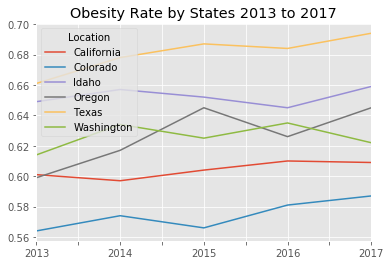

In [43]:
obs_st_df=obs_states_df.set_index('Location')
obs_st_df=obs_st_df.transpose()
obs_st_df

# ax = plt.axes()
# ax.set_facecolor("xkcd:light grey")
obs_st_df.plot.line(title="Obesity Rate by States 2013 to 2017")
plt.show()

In [32]:
liver_yearrate_df = liver_df.drop(['AVERAGE DEATH RATE',
'TOTAL DEATHS',
'2005 DEATH COUNT',
'2014 DEATH COUNT',
'2015 DEATH COUNT',
'2016 DEATH COUNT',
'2017 DEATH COUNT',
'14 - 17 DEATH RATE CHANGE',
'14 - 17 DEATH RATE % CHANGE',
'14 - 17 DEATHS % CHANGE'], axis=1)
liver_yearrate_df = liver_yearrate_df.loc[liver_yearrate_df['STATE'].isin(["CA", "CO", "ID","OR","TX","WA"])]
liver_yearrate_df.head()

,STATE,2005 DEATH RATE,2014 DEATH RATE,2015 DEATH RATE,2016 DEATH RATE,2017 DEATH RATE
4,CA,11.1,12.0,12.7,12.2,12.1
5,CO,9.5,12.7,12.2,12.4,14.0
12,ID,8.9,11.0,12.2,9.9,10.2
36,OR,10.0,12.8,13.7,12.2,12.6
42,TX,11.7,13.5,13.8,13.5,13.9


In [33]:
liver_rate = liver_yearrate_df.set_index("STATE")
liver_rate = liver_rate.transpose()
liver_rate

STATE,CA,CO,ID,OR,TX,WA
2005 DEATH RATE,11.1,9.5,8.9,10.0,11.7,8.6
2014 DEATH RATE,12.0,12.7,11.0,12.8,13.5,11.1
2015 DEATH RATE,12.7,12.2,12.2,13.7,13.8,12.4
2016 DEATH RATE,12.2,12.4,9.9,12.2,13.5,11.1
2017 DEATH RATE,12.1,14.0,10.2,12.6,13.9,11.4


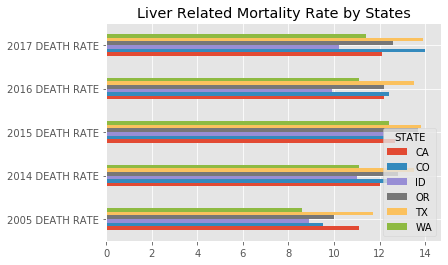

In [41]:
liver_rate.plot.barh(title="Liver Related Mortality Rate by States")
plt.show()